In [6]:
from astropy.io import fits
hdul1 = fits.open('../SDSS_DR16_QSO_based_MgII_Absorber_Catalog.fits')
print(hdul1[1].columns)


ColDefs(
    name = 'CORRECTED_NABS_WITH_ALL_QSO'; format = 'D'
    name = 'CORRECTED_NABS_WITH_QSO_SN_GR_1'; format = 'D'
    name = 'CORRECTED_NABS_WITH_QSO_SN_GR_2'; format = 'D'
    name = 'DEC_QSO'; format = 'D'; unit = 'DEG'
    name = 'DELTA_V_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'DELTA_V_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'EIGENSPEC_INDEX'; format = 'K'
    name = 'ERR_DELTA_V_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'ERR_DELTA_V_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'ERR_FWHM_VDISP_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'ERR_FWHM_VDISP_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'ERR_REST_EW_MGII_2796'; format = 'D'; unit = 'Angstrom'
    name = 'ERR_REST_EW_MGII_2803'; format = 'D'; unit = 'Angstrom'
    name = 'FIBER_ID'; format = 'K'
    name = 'FWHM_VDISP_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'FWHM_VDISP_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'MJD'; format = 'K'
    name = 'PAR

In [7]:

Plate1 = hdul1[1].data['PLATE']
Fiber1 = hdul1[1].data['FIBER_ID']
MJD1 = hdul1[1].data['MJD']
Zabs = hdul1[1].data['Z_ABS']
Nabs = hdul1[1].data['CORRECTED_NABS_WITH_ALL_QSO']
Zqso1 = hdul1[1].data['Z_QSO']
Rew_2796 = hdul1[1].data['REST_EW_MGII_2796']
err_Rew_2796 = hdul1[1].data['ERR_REST_EW_MGII_2796']
Rew_2803 = hdul1[1].data['REST_EW_MGII_2803']
err_Rew_2803 = hdul1[1].data['ERR_REST_EW_MGII_2803']
print(len(MJD1))

159524


In [8]:
k = 0
Plate1 = list(Plate1)
Fiber1 = list(Fiber1)
for i in range(len(MJD1)):
    if len(str(Plate1[i]))==3:
        Plate1[i] = '0'+str(Plate1[i])
    if len(str(Fiber1[i]))==3:
        Fiber1[i] = '0'+str(Fiber1[i])
    if len(str(Plate1[i]))==2:
        Plate1[i] = '00'+str(Plate1[i])
    if len(str(Fiber1[i]))==2:
        Fiber1[i] = '00'+str(Fiber1[i])
    if len(str(Plate1[i]))==1:
        Plate1[i] = '000'+str(Plate1[i])
    if len(str(Fiber1[i]))==1:
        Fiber1[i] = '000'+str(Fiber1[i])


In [4]:
from tqdm.auto import tqdm
list_fits = []
for i in tqdm(range(len(MJD1))):
    list_fits.append('spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits')
print(len(list_fits))

  0%|          | 0/159524 [00:00<?, ?it/s]

159524


In [10]:
import glob,os
files = os.listdir('./Data/mg2')
print(len(files))

67971


In [13]:
cd ../non

D:\IUCAA\CNN-DR16\DATA\non


In [ ]:
import glob,os
files2 = os.listdir('./Data/non')
print(len(files2))

In [16]:
import os
n = 0
k = []
from tqdm.auto import tqdm
for i in tqdm(files):
    try:
        os.remove(i)
    except:
        k.append(i)
        n = n+1
print(n)


  0%|          | 0/67971 [00:00<?, ?it/s]

60207


In [5]:
pwd

'D:\\IUCAA\\CNN-DR16'

In [7]:
from tqdm.auto import tqdm
import shutil
files2= []
k = 0
for i in tqdm(files):
    for j in list_fits:
        if j == i :
            k = k+1
            #shutil.copy('../SDSS_SNR5/'+j , 'Data_mult/mg2/')
            files2.append(j)
print(k)


  0%|          | 0/255991 [00:00<?, ?it/s]

79433


In [9]:
pwd

'D:\\IUCAA\\CNN-DR16'

In [10]:

for i in tqdm(files2):
    shutil.copy('../SDSS_SNR5/'+i , 'Data_mult/mg2/')


  0%|          | 0/79433 [00:00<?, ?it/s]

In [9]:
files3 = list(set(files)-set(list_fits))
len(files2)

197723

In [10]:
k = 0
for i in tqdm(files2[:len(list_fits)]):
    shutil.copy('../SDSS_SNR5/'+i , 'Data/non/')


  0%|          | 0/159524 [00:00<?, ?it/s]

0


In [1]:
import glob,os
files1 = os.listdir('./Data/mg2')
print(len(files1))

67971


In [2]:
import glob,os
files2 = os.listdir('./Data/non')
print(len(files2))

151755


In [3]:
files3 = list(set(files2)-set(files1))

In [4]:
len(files3)

151755

In [3]:
from astropy.io import fits
hdul2 = fits.open('./Searched_Quasars_SDSS_DR7_107.fits')
#print(hdul2[1].columns)
Ra2 = hdul2[1].data['RA']
DEC2 = hdul2[1].data['DEC']
Plate2 = hdul2[1].data['PLATE']
Fiber2 = hdul2[1].data['FIBER']
MJD2 = hdul2[1].data['MJD']
Zqso2 = hdul2[1].data['ZQSO']
print(len(MJD2))

84533


# Removing narrow abosorbtion lines using criteria $ EW> 3*\sigma_{EW}$  #

In [4]:
from tqdm.auto import tqdm
path = []
discard = []
for i in tqdm(range(len(MJD1))):
    path.append('spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits')
    for j in range(len(Rew_2796[i])):
        if Rew_2796[i][j] < 3*err_Rew_2796[i][j] and Rew_2803[i][j] < 3*err_Rew_2803[i][j]:
                   name = 'spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits'
                   discard.append(name)

print(len(path))
print(len(discard))

  0%|          | 0/26761 [00:00<?, ?it/s]

26761
1780


In [5]:
ew_checked = list(set(path) - set(discard))
print(len(ew_checked))

25010


In [6]:
import os
fits_files = []
list_dir = os.listdir('run1/mg2/')
for i in tqdm(ew_checked):
    for j in list_dir:
        if i == j:
            fits_files.append(j)
            
print(len(fits_files))

  0%|          | 0/25010 [00:00<?, ?it/s]

1085


In [7]:
import glob
files2 = os.listdir('run1/non/')
print(len(files2))
fits_files2 = files2[:len(fits_files)]
print(len(fits_files2))

1768
1085


In [8]:
list_Z_emi1 = []
list_Z_emi2 = []

for i in tqdm(range(len(MJD1))):
    for j in fits_files:
        if 'spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits' == j :
            list_Z_emi1.append(Zqso1[i])
print(len(list_Z_emi1))
            
for i in tqdm(range(len(MJD2))):
    for j in fits_files2:
        if 'spec-'+str(Plate2[i])+ '-' +str(MJD2[i])+ '-'+str(Fiber2[i])+'.fits' == j :
            list_Z_emi2.append(Zqso2[i])    
print(len(list_Z_emi2))

  0%|          | 0/26761 [00:00<?, ?it/s]

1085


  0%|          | 0/84533 [00:00<?, ?it/s]

1085


In [9]:
from astropy.io import fits
specs = []
waves = []

unchanged = 0

for f in tqdm(range(len(fits_files))):
    spectra = fits.open('run1/mg2/'+ fits_files[f] )
    wave = 10**spectra[1].data['loglam']
    spec = spectra[1].data['model']
    if list_Z_emi1[f] <=1:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 4250 :
                X.append(wave[i])
                Y.append(spec[i])
        specs.append(Y)
        waves.append(X)
    
    elif 1< list_Z_emi1[f] <= 1.8:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 3100 :
                X.append(wave[i])
                Y.append(spec[i])
        specs.append(Y)
        waves.append(X)
        
    elif 1.8< list_Z_emi1[f] <= 2.8:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 2250 :
                X.append(wave[i])
                Y.append(spec[i])
        specs.append(Y)
        waves.append(X)
        
    elif 2.8< list_Z_emi1[f] <= 4.8:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 1500 :
                X.append(wave[i])
                Y.append(spec[i])
        specs.append(Y)
        waves.append(X)
        
    else:
        unchanged +=1
        specs.append(spec)
        waves.append(wave)
    
print(len(specs), len(waves), unchanged)

  0%|          | 0/1085 [00:00<?, ?it/s]

1085 1085 0


In [10]:
from astropy.io import fits
specs2 = []
waves2 = []

unchanged2 = 0

for f in tqdm(range(len(fits_files2))):
    spectra = fits.open('run1/non/'+ fits_files2[f] )
    wave = 10**spectra[1].data['loglam']
    spec = spectra[1].data['model']
    if list_Z_emi1[f] <=1:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 4250 :
                X.append(wave[i])
                Y.append(spec[i])
        specs2.append(Y)
        waves2.append(X)
    
    elif 1< list_Z_emi1[f] <= 1.8:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 3100 :
                X.append(wave[i])
                Y.append(spec[i])
        specs2.append(Y)
        waves2.append(X)
        
    elif 1.8< list_Z_emi1[f] <= 2.8:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 2250 :
                X.append(wave[i])
                Y.append(spec[i])
        specs2.append(Y)
        waves2.append(X)
        
    elif 2.8< list_Z_emi1[f] <= 4.8:
        X,Y = [],[]
        for i in range(spec.shape[0]):
            if wave[i] > 1500 :
                X.append(wave[i])
                Y.append(spec[i])
        specs2.append(Y)
        waves2.append(X)
        
    else:
        unchanged2 +=1
        specs2.append(spec)
        waves2.append(wave)
    
print(len(specs2), len(waves2), unchanged2)

  0%|          | 0/1085 [00:00<?, ?it/s]

1085 1085 0


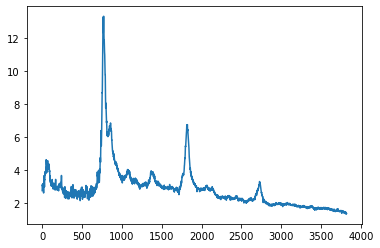

In [12]:

from matplotlib import pyplot as plt
plt.plot(specs[0])

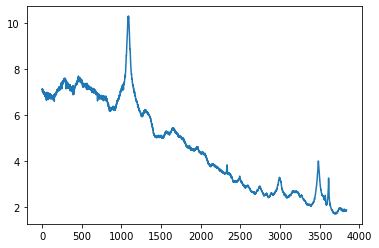

In [13]:

from matplotlib import pyplot as plt
plt.plot(specs2[0])

In [17]:
from scipy.ndimage import interpolation
import numpy as np
specs_inter = []
temp = specs + specs2

for i in tqdm(temp):
    x = np.array(i)
    i = 3841
    z = i / len(x)
    x_int = interpolation.zoom(x,z)
    #np.expand_dims(x_int, axis=0)
    specs_inter.append(x_int)
specs_inter = np.array(specs_inter)
#specs_inter = np.expand_dims(specs_inter, axis=2)
print(specs_inter.shape)

  0%|          | 0/2170 [00:00<?, ?it/s]

(2170, 3841)


In [33]:
y = np.array(list(np.ones(1085))+list(np.zeros(1085)))
print(y.shape)

(2170,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(specs_inter, y, random_state=0, train_size = .8)
print('training data:', len(X_train), len(y_train))
print('testing data:', len(X_test), len(y_test))

training data: 1736 1736
testing data: 434 434


In [28]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv1D(filters=96, kernel_size=15, activation='relu', input_shape=(3841,1)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.5))
model.add(Conv1D(filters=384, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=384, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='softmax'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 3827, 96)          1536      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1275, 96)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 1271, 256)         123136    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 423, 256)         0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 423, 256)          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 421, 384)         

In [29]:
model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=2)

Epoch 1/20
87/87 - 4s - loss: 0.8765 - accuracy: 0.4971 - 4s/epoch - 50ms/step
Epoch 2/20
87/87 - 3s - loss: 0.6933 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 3/20
87/87 - 3s - loss: 0.6933 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 4/20
87/87 - 3s - loss: 0.6932 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 5/20
87/87 - 3s - loss: 0.6933 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 6/20
87/87 - 3s - loss: 0.6932 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 7/20
87/87 - 3s - loss: 0.6932 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 8/20
87/87 - 3s - loss: 0.6932 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 9/20
87/87 - 3s - loss: 0.6933 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 10/20
87/87 - 3s - loss: 0.6932 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 11/20
87/87 - 3s - loss: 0.6932 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 12/20
87/87 - 3s - loss: 0.6933 - accuracy: 0.4971 - 3s/epoch - 37ms/step
Epoch 13/20
87/87 - 3s - loss: 0.6932 - accuracy:

In [137]:
model.predict(X_test)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

# 2D convolution #

In [30]:
reshaped = []
for i in specs_inter:
    i = i.reshape(23,167)
    i = np.expand_dims(i, axis=-1)
    reshaped.append(i)
reshaped = np.array(reshaped)


In [31]:
reshaped.shape

(2170, 23, 167, 1)

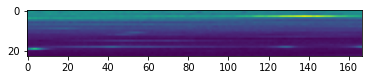

In [62]:
from matplotlib import pyplot as plt
plt.imshow(reshaped[2000])

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(reshaped, y, random_state=0, train_size = .8)
print('training data:', len(x_train), len(y_train))
print('testing data:', len(x_test), len(y_test))

training data: 1736 1736
testing data: 434 434


In [33]:
import autokeras as ak
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

Trial 1 Complete [00h 00m 07s]
val_loss: 0.636089563369751

Best val_loss So Far: 0.636089563369751
Total elapsed time: 00h 00m 07s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
55/55 [==============================] - 1s 11ms/step - loss: 0.6969 - accuracy: 0.5386
Epoch 2/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6803 - accuracy: 0.5806
Epoch 3/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6731 - accuracy: 0.5939
Epoch 4/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6612 - accuracy: 0.6175
Epoch 5/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6123
Epoch 6/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6484 - accuracy: 0.6273
Epoch 7/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6409 - accuracy: 0.6204
Epoch 8/10
55/55 [==============================] - 0s 9ms/step - loss: 0.6326 - accuracy: 0.6342
Epoch 9/10
55/55 [===========================

INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


In [34]:

# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))


14/14 [==============================] - 0s 4ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]

In [37]:
for i in range(len(y_test)):
    print(predicted_y[i],  y_test[i])

[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 0.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 0.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 0.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 0.0
[0.] 1.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 1.0
[0.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 1.0
[0.] 1.0
[

# Star-Net Model #

In [38]:
import os
import numpy as np
import h5py
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.utils.data import TensorDataset, DataLoader

from torchsummary import summary


In [45]:
from scipy.ndimage import interpolation
import numpy as np
specs_inter = []
temp = specs + specs2

for i in tqdm(temp):
    x = np.array(i)
    i = 3841
    z = i / len(x)
    x_int = interpolation.zoom(x,z)
    #np.expand_dims(x_int, axis=0)
    specs_inter.append(x_int)
specs_inter = np.array(specs_inter)
#specs_inter = np.expand_dims(specs_inter, axis=2)
print(specs_inter.shape)

  0%|          | 0/2170 [00:00<?, ?it/s]

(2170, 3841)


In [46]:
from sklearn.model_selection import train_test_split

x_train, x_split, y_train, y_split = train_test_split(specs_inter, y,shuffle= True, random_state=42, train_size = .8)
x_val, x_test, y_val, y_test = train_test_split(x_split, y_split,shuffle= True, random_state=42, train_size = .5)
print('training data:', len(x_train), len(y_train))
print('val data:', len(x_val), len(y_val))
print('testing data:', len(x_test), len(y_test))

training data: 1736 1736
val data: 217 217
testing data: 217 217


In [47]:
num_labels = 1
num_fluxes = x_train.shape[1]

In [48]:
# Number of filters used in the convolutional layers
num_filters = [4,16]

# Length of the filters in the convolutional layers
filter_length = 8

# Length of the maxpooling window 
pool_length = 4

# Number of nodes in each of the hidden fully connected layers
num_hidden = [256,128]

def compute_out_size(in_size, mod):
    """
    Compute output size of Module `mod` given an input with size `in_size`.
    """
    
    f = mod.forward(autograd.Variable(torch.Tensor(1, *in_size)))
    return f.size()[1:]

class StarNet(nn.Module):
    def __init__(self, num_fluxes, num_filters, filter_length, 
                 pool_length, num_hidden, num_labels):
        super().__init__()
        
        # Convolutional and pooling layers
        self.conv1 = nn.Conv1d(1, num_filters[0], filter_length)
        self.conv2 = nn.Conv1d(num_filters[0], num_filters[1], filter_length)
        self.pool = nn.MaxPool1d(pool_length, pool_length)
        
        # Determine shape after pooling
        pool_output_shape = compute_out_size((1,num_fluxes), 
                                             nn.Sequential(self.conv1, 
                                                           self.conv2, 
                                                           self.pool))
        
        # Fully connected layers
        self.fc1 = nn.Linear(pool_output_shape[0]*pool_output_shape[1], num_hidden[0])
        self.fc2 = nn.Linear(num_hidden[0], num_hidden[1])
        self.output = nn.Linear(num_hidden[1], num_labels)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        x = self.output(x)
        return x


model = StarNet(num_fluxes, num_filters, filter_length, 
          pool_length, num_hidden, num_labels)

summary(model, (1, num_fluxes))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 4, 3834]              36
            Conv1d-2             [-1, 16, 3827]             528
         MaxPool1d-3              [-1, 16, 956]               0
            Linear-4                  [-1, 256]       3,916,032
            Linear-5                  [-1, 128]          32,896
            Linear-6                    [-1, 1]             129
Total params: 3,949,621
Trainable params: 3,949,621
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.70
Params size (MB): 15.07
Estimated Total Size (MB): 15.79
----------------------------------------------------------------


C:\Users\91766\AppData\Local\Temp\ipykernel_14600\2892720879.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [49]:
# number of spectra fed into model at once during training
batch_size = 32

# number of epochs
num_epochs = 15

# initial learning rate for optimization algorithm
learning_rate = 0.0007

# Construct optimizer
optimizer = torch.optim.Adam(model.parameters(), learning_rate,
                             weight_decay=0)

In [50]:
train_dataset = TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(torch.Tensor(x_val),torch.Tensor(y_val))
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [51]:
print_iters = 200
train_losses = []
val_losses = []
# loop over the dataset multiple times
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # Collect batch data
        x_batch, y_batch = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = model(x_batch.unsqueeze(1))
        loss = torch.nn.MSELoss()(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i+1) % print_iters == 0:
            print('[Epoch %i, %0.0f%%] Train Loss: %0.4f' % (epoch+1, 
                                                       (i+1)/len(train_dataloader)*100, 
                                                       running_loss/(i+1)), end="\r")
    train_loss = running_loss/len(train_dataloader)
    running_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_dataloader, 0):
            # Collect batch data
            x_batch, y_batch = data
            y_pred = model(x_batch.unsqueeze(1))
            loss = torch.nn.MSELoss()(y_pred, y_batch)
            running_loss += loss.item()
    val_loss = running_loss/len(val_dataloader)
    print('[Epoch %i] Train Loss: %0.4f, Val Loss: %0.4f' % (epoch+1,  
                                                             train_loss, 
                                                             val_loss))
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
print('Finished Training')

C:\Users\91766\AppData\Local\Temp\ipykernel_14600\2892720879.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))
C:\Users\91766\anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\91766\anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\91766\anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Us

[Epoch 1] Train Loss: 0.3879, Val Loss: 0.3345
[Epoch 2] Train Loss: 0.3419, Val Loss: 0.3003
[Epoch 3] Train Loss: 0.3081, Val Loss: 0.2773
[Epoch 4] Train Loss: 0.2828, Val Loss: 0.2633
[Epoch 5] Train Loss: 0.2706, Val Loss: 0.2552
[Epoch 6] Train Loss: 0.2610, Val Loss: 0.2510
[Epoch 7] Train Loss: 0.2550, Val Loss: 0.2491
[Epoch 8] Train Loss: 0.2528, Val Loss: 0.2487
[Epoch 9] Train Loss: 0.2518, Val Loss: 0.2487
[Epoch 10] Train Loss: 0.2507, Val Loss: 0.2489
[Epoch 11] Train Loss: 0.2505, Val Loss: 0.2492
[Epoch 12] Train Loss: 0.2501, Val Loss: 0.2496
[Epoch 13] Train Loss: 0.2500, Val Loss: 0.2497
[Epoch 14] Train Loss: 0.2501, Val Loss: 0.2498
[Epoch 15] Train Loss: 0.2501, Val Loss: 0.2500
Finished Training


In [42]:
model_filename =  os.path.join('./','starnet_cnn-3.pth.tar')
torch.save({'optimizer' : optimizer.state_dict(),
            'model' : model.state_dict()}, 
           model_filename)

In [75]:
num_fluxes = 3841
num_labels = 1

# Number of filters used in the convolutional layers
num_filters = [4,16]

# Length of the filters in the convolutional layers
filter_length = 8

# Length of the maxpooling window 
pool_length = 4

# Number of nodes in each of the hidden fully connected layers
num_hidden = [256,128]

def compute_out_size(in_size, mod):
    """
    Compute output size of Module `mod` given an input with size `in_size`.
    """
    
    f = mod.forward(autograd.Variable(torch.Tensor(1, *in_size)))
    return f.size()[1:]

class StarNet(nn.Module):
    def __init__(self, num_fluxes, num_filters, filter_length, 
                 pool_length, num_hidden, num_labels):
        super().__init__()
        
        # Convolutional and pooling layers
        self.conv1 = nn.Conv1d(1, num_filters[0], filter_length)
        self.conv2 = nn.Conv1d(num_filters[0], num_filters[1], filter_length)
        self.pool = nn.MaxPool1d(pool_length, pool_length)
        
        # Determine shape after pooling
        pool_output_shape = compute_out_size((1,num_fluxes), 
                                             nn.Sequential(self.conv1, 
                                                           self.conv2, 
                                                           self.pool))
        
        # Fully connected layers
        self.fc1 = nn.Linear(pool_output_shape[0]*pool_output_shape[1], num_hidden[0])
        self.fc2 = nn.Linear(num_hidden[0], num_hidden[1])
        self.output = nn.Linear(num_hidden[1], num_labels)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x


model = StarNet(num_fluxes, num_filters, filter_length, 
          pool_length, num_hidden, num_labels)

# Load model weights
model_filename =  os.path.join('./','starnet_cnn-1.pth.tar')
checkpoint = torch.load(model_filename, map_location=lambda storage, loc: storage)
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [52]:

test_dataset = TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test))
test_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [53]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import time
from matplotlib import gridspec

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.utils.data import TensorDataset, DataLoader


time1 = time.time()
test_predictions = []
with torch.no_grad():
    for i, x_batch in enumerate(test_dataloader, 0):
        test_predictions.append((model(x_batch[0].unsqueeze(1)).data.numpy()))
test_predictions = np.concatenate(test_predictions)
#print('%0.2f seconds to make %i predictions.' % (time.time()-time1, len(x_test))))

C:\Users\91766\AppData\Local\Temp\ipykernel_14600\2892720879.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [54]:
print(test_predictions[:100], y_test[0:100])

[[0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49961877]
 [0.49

# K mean Clustering

In [18]:
from sklearn.cluster import KMeans
import numpy as np

In [35]:

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)


In [36]:
for i in range(100):
    print(kmeans.labels_[i])

0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0


In [43]:
X_train.shape

(1736, 3841)

In [50]:
pred = kmeans.fit_predict(X_test)

In [54]:
k=0
for i in range(pred.shape[0]):
    if pred[i]==y_test[i]:
        k = k+1
print(k,pred.shape[0])

209 434


In [49]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

AttributeError: 'NoneType' object has no attribute 'split'

In [48]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\91766\anaconda3\lib\site-packages
Requires: numpy, threadpoolctl, scipy, joblib
Required-by: scikit-learn-intelex
